In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.linear_model import LinearRegression
filterwarnings("ignore")

In [54]:
df = pd.read_csv("Training_Dataset_v2.csv")

In [55]:
df.head(1)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,No,No,No,Yes,No,No


### Null Values

In [56]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

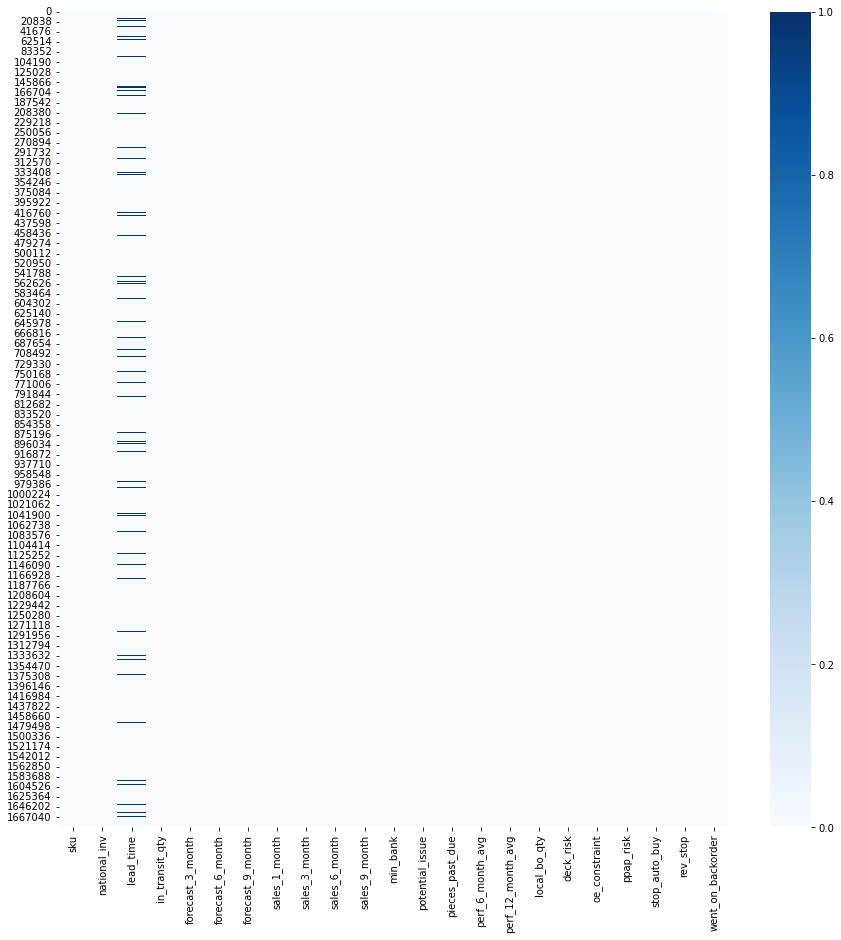

In [58]:
plt.figure(figsize = (15,15))
sns.heatmap(df.isnull(), cmap = 'Blues')
plt.show()

# Distribution of Features


In [59]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [60]:
from scipy.stats import zscore

In [61]:
df.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003326,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,-0.013544,-0.010732,0.014887
lead_time,0.003326,1.000000,-0.007238,-0.008010,-0.008513,-0.008738,-0.006013,-0.007279,-0.007270,-0.007313,-0.008198,-0.001500,-0.099940,-0.106019,-0.001306
in_transit_qty,0.098238,-0.007238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.003282,0.004292,0.066612
forecast_3_month,0.078199,-0.008010,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.008445,0.008694,0.039419
forecast_6_month,0.079744,-0.008513,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.008343,0.008499,0.039724
forecast_9_month,0.078948,-0.008738,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.008306,0.008421,0.039732
sales_1_month,0.147449,-0.006013,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.001163,0.002370,0.066188
sales_3_month,0.192605,-0.007279,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.001488,0.002837,0.071030
sales_6_month,0.225067,-0.007270,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.002898,0.004221,0.057765
sales_9_month,0.239613,-0.007313,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.003438,0.004749,0.048880


In [62]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [63]:
df[df.national_inv.isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.drop(1687860, inplace=True)

In [65]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

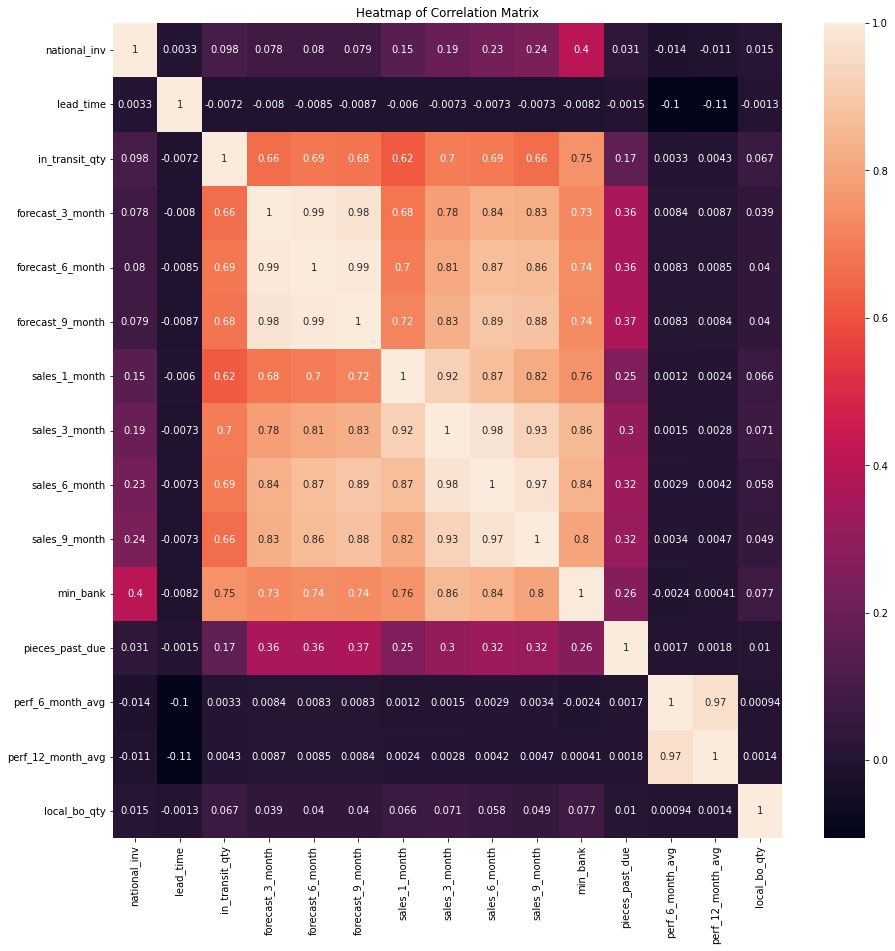

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
col_corr =df.corr()
sns.heatmap(col_corr, annot=True)
plt.title('Heatmap of Correlation Matrix')

Text(0.5, 1.0, 'Transit Duration range and distribution')

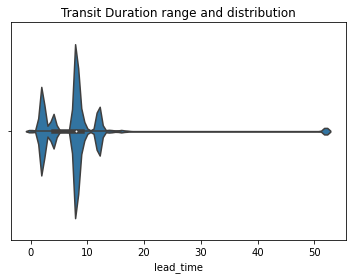

In [67]:
# View range and distribution
sns.violinplot(df.lead_time)
plt.title('Transit Duration range and distribution')

In [68]:
#Filling null with median value
df['lead_time']=df.lead_time.fillna(df.lead_time.median())
df.lead_time.isnull().sum()

0

In [69]:
# Replace -99 with Nan
df.perf_6_month_avg.replace({-99.00:np.nan}, inplace=True)
df.perf_12_month_avg.replace({-99.00:np.nan}, inplace=True)

In [70]:
(df.perf_6_month_avg == -99.00).sum()

0

In [71]:
(df.perf_12_month_avg == -99).sum()

0

Text(0.5, 1.0, 'perf_6_month_avg range and distribution')

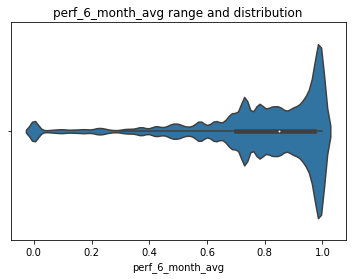

In [72]:
# View range and distribution
sns.violinplot(df.perf_6_month_avg)
plt.title('perf_6_month_avg range and distribution')


In [73]:
#impute null with median
df.perf_6_month_avg.fillna(df.perf_6_month_avg.median(), inplace=True)

Text(0.5, 1.0, 'perf_12_month_avg range and distribution')

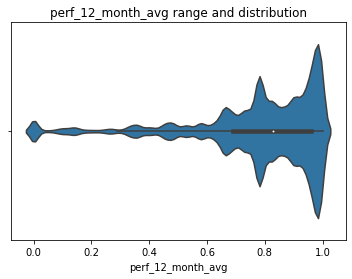

In [74]:
# View range and distribution
sns.violinplot(df.perf_12_month_avg)
plt.title('perf_12_month_avg range and distribution')

In [75]:
#impute null with median
df.perf_12_month_avg.fillna(df.perf_12_month_avg.median(), inplace=True)
df.perf_12_month_avg.isnull().sum()

0

In [76]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [77]:
df_num = df.select_dtypes(include = np.number)

In [78]:
df_num.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

It seems there are many 0's in our dataset. Let's find out the *repetition of 0's *in each column. If any of the columns has more than 60%, 0 we can safely drop that column. This kind of data trend can be viewed on violinplot.



Text(0.5, 1.0, 'transit_quantity range and distribution')

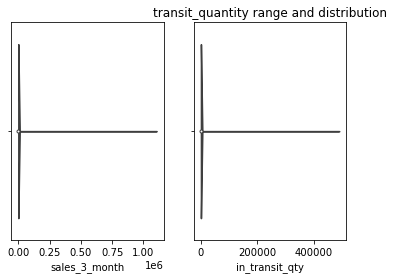

In [79]:
fig , ax1 = plt.subplots(ncols=2)
sns.violinplot(df.sales_3_month,   ax=ax1[0])
#sns.plt.title('transit_quantity range and distribution')

sns.violinplot(df.in_transit_qty,  ax=ax1[1])
plt.title('transit_quantity range and distribution')

In [80]:
# Calculate the repeatition of 0 in each column
perct_0  = {column: '%2.2f' % (((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns if df[column].dtype == np.float64}


In [81]:
perct_0 

{'national_inv': '6.42%',
 'lead_time': '0.62%',
 'in_transit_qty': '79.67%',
 'forecast_3_month': '69.78%',
 'forecast_6_month': '64.23%',
 'forecast_9_month': '61.22%',
 'sales_1_month': '56.87%',
 'sales_3_month': '44.98%',
 'sales_6_month': '38.33%',
 'sales_9_month': '34.72%',
 'min_bank': '51.68%',
 'pieces_past_due': '98.50%',
 'perf_6_month_avg': '2.31%',
 'perf_12_month_avg': '1.95%',
 'local_bo_qty': '98.62%'}

In [82]:
# Drop the column having more than 60% of 0's 
df = df.drop(['sales_3_month','sales_6_month','sales_9_month','pieces_past_due','local_bo_qty','in_transit_qty'], axis=1)

In [83]:
df.shape

(1687860, 17)

In [84]:
df = df.drop(['sku'],axis =1)

In [85]:
df_encoded = pd.get_dummies(data = df,drop_first = True)
df_encoded.head()

,national_inv,lead_time,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,min_bank,perf_6_month_avg,perf_12_month_avg,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,1.0,0.10,0.13,0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,2.0,0.85,0.83,0,1,0,0,1,0,0


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
Y = df_encoded['went_on_backorder_Yes']
X = df_encoded.drop('went_on_backorder_Yes', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(random_state = 42)
X_train_new, Y_train_new = sm.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='went_on_backorder_Yes', ylabel='count'>

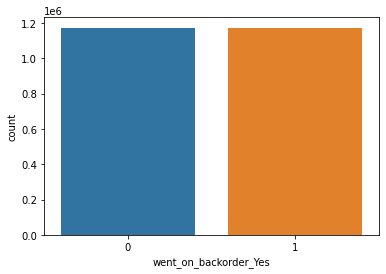

In [90]:
sns.countplot(Y_train_new)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
logreg =  LogisticRegression(random_state = 10, max_iter = 1000)
logreg.fit(X_train, y_train)

logreg_SMOTE = LogisticRegression(random_state = 10, max_iter = 1000)
logreg_SMOTE.fit(X_train_new, Y_train_new)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
y_pred_log = logreg.predict(X_test)
accuracy_score(y_pred_log,y_test)

In [50]:
print(classification_report(y_pred_log,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    506353
           1       0.00      0.00      0.00         5

    accuracy                           0.99    506358
   macro avg       0.50      0.50      0.50    506358
weighted avg       1.00      0.99      1.00    506358



In [51]:
y_pred_log_sm = logreg_SMOTE.predict(X_test)
accuracy_score(y_pred_log_sm,y_test)

0.648718890587292

In [52]:
print(classification_report(y_pred_log_sm,y_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79    327138
           1       0.70      0.01      0.03    179220

    accuracy                           0.65    506358
   macro avg       0.67      0.51      0.41    506358
weighted avg       0.67      0.65      0.52    506358



<AxesSubplot:>

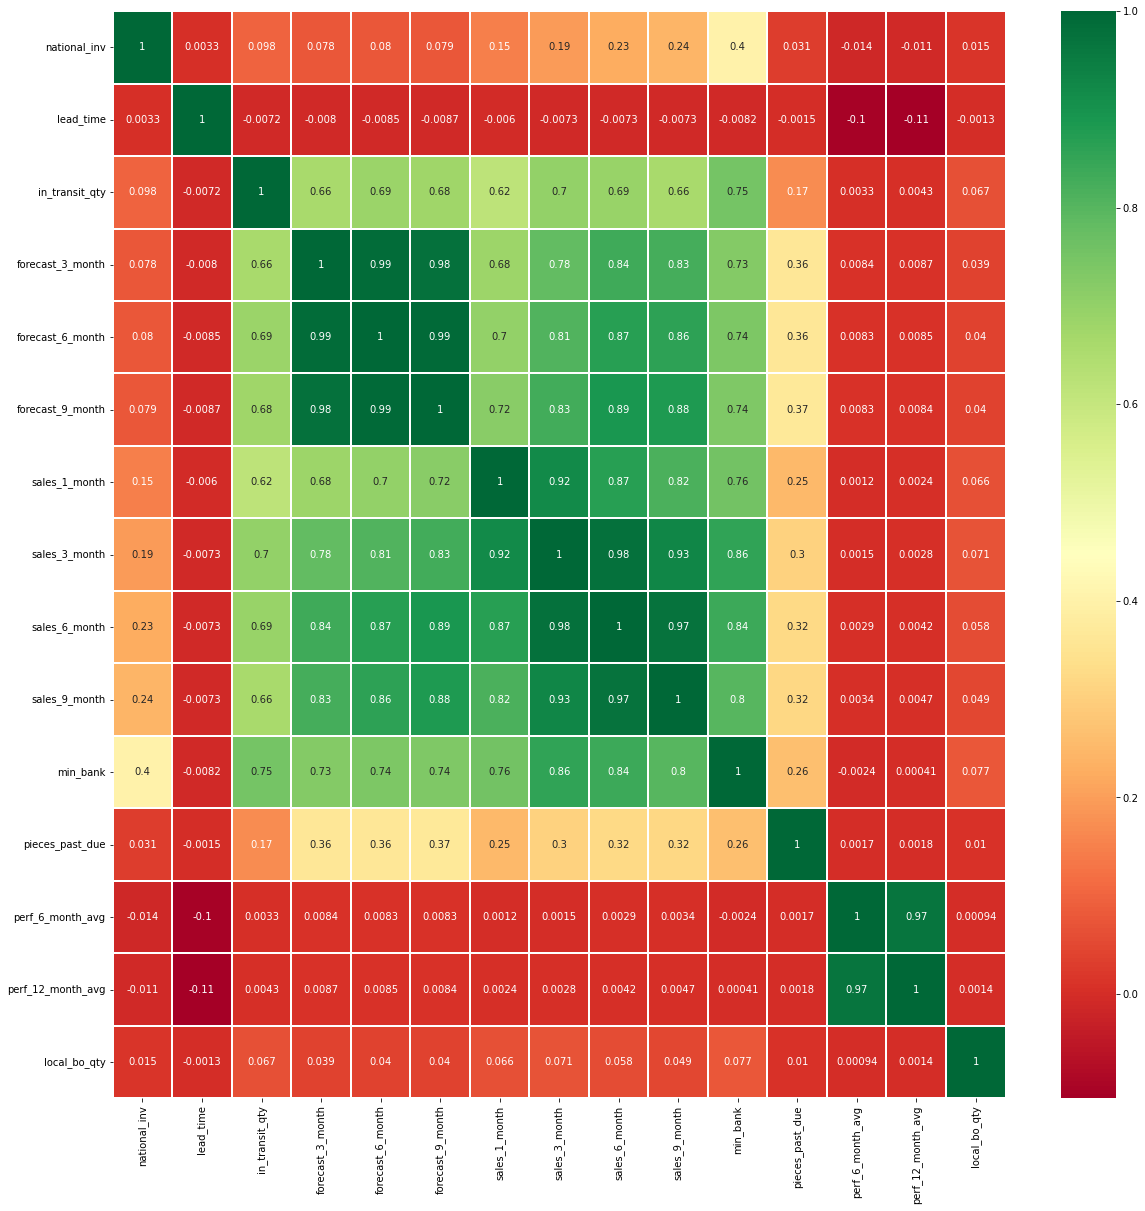

In [62]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap ='RdYlGn', linewidth = 0.15)

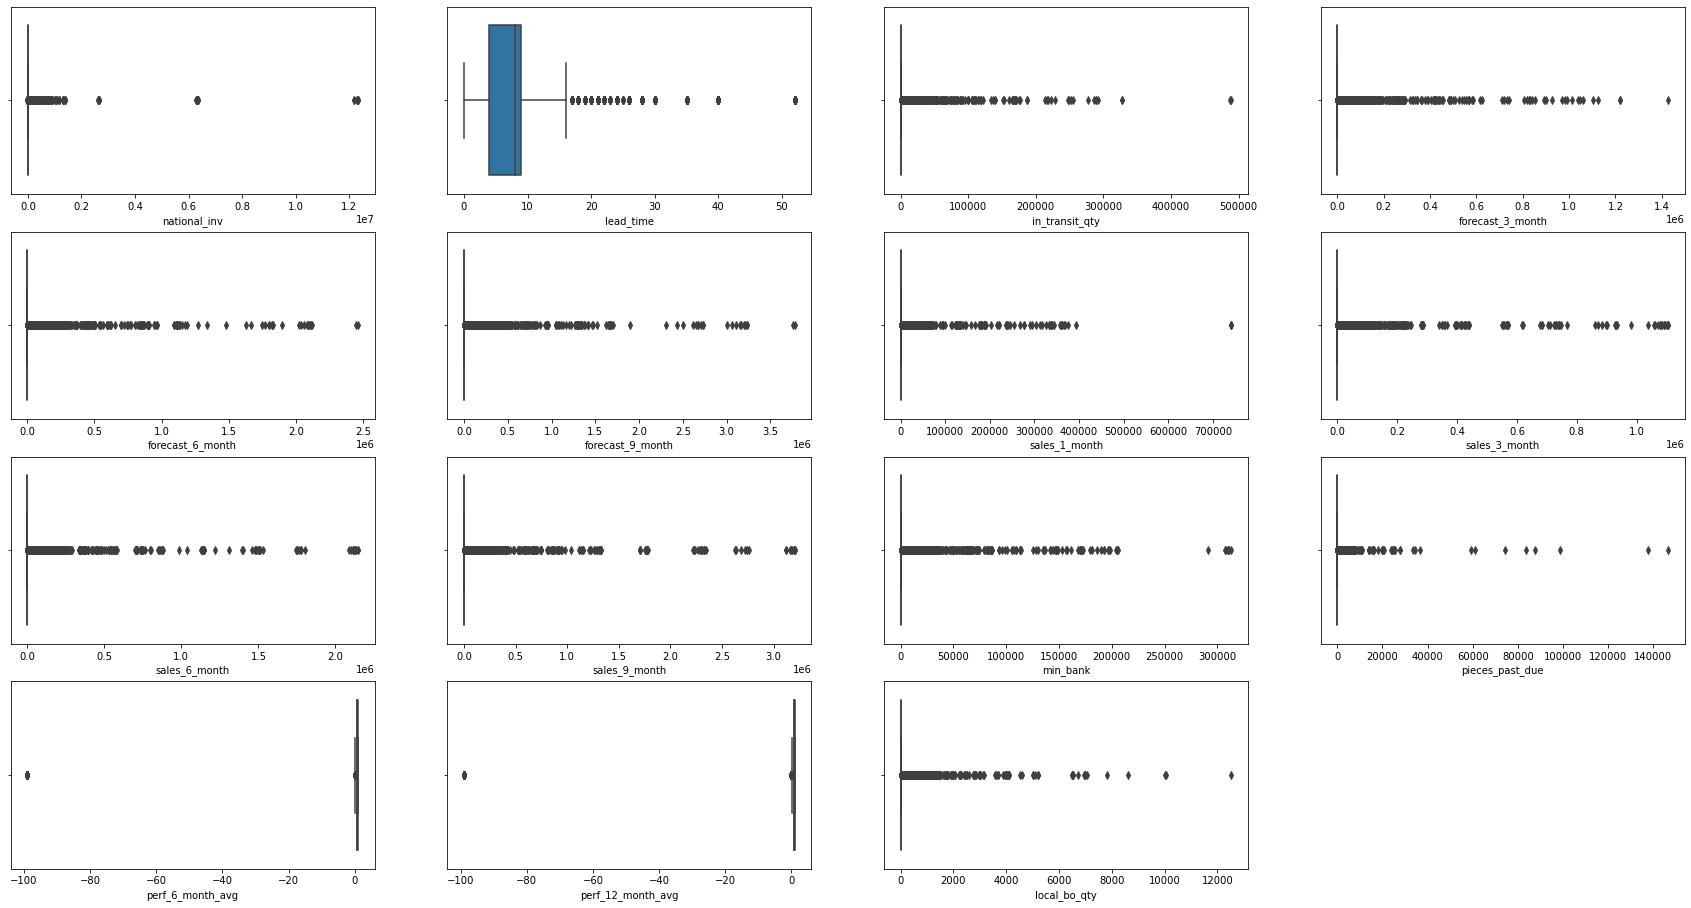

In [63]:
1### Box Plot to see outliers with orginal data w/o removing null values
j = 1
plt.figure(figsize = (30,20))
for i in df_num.columns:
    plt.subplot(5,4,j)
    sns.boxplot(x = df_num[i])
    j+=1
plt.show()

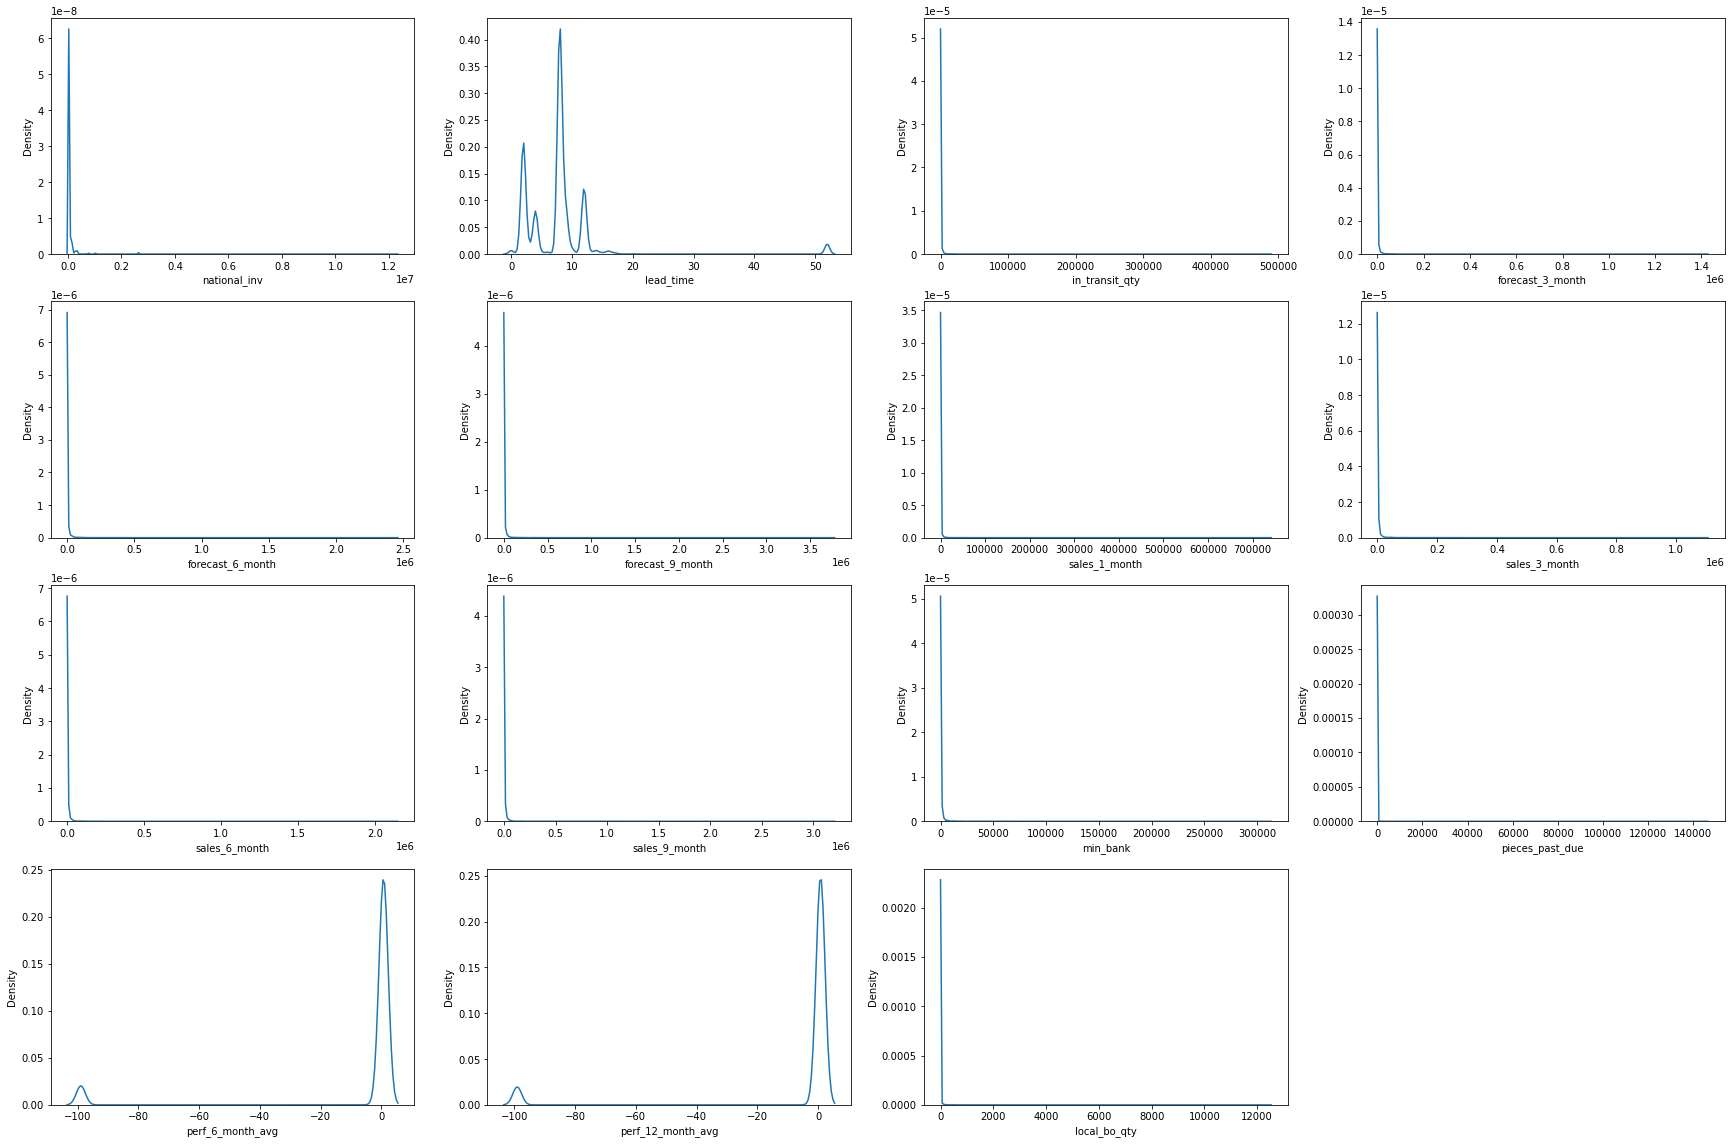

In [19]:
j = 1
plt.figure(figsize = (30,20))
for i in df_num.columns:
  plt.subplot(4,4,j)
  sns.kdeplot(df_num[i])
  j+=1
plt.show()

In [20]:
### Transformations

In [21]:
from sklearn.preprocessing import QuantileTransformer

In [22]:
qt = QuantileTransformer(random_state = 10)

In [23]:
ar_t = qt.fit_transform(df_num)

In [24]:
df_t = pd.DataFrame(data = ar_t, columns = df_num.columns)

In [25]:
df_t.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,5.005437e-01,5.003167e-01,1.824293e-01,2.565128e-01,2.933424e-01,3.121585e-01,3.376551e-01,3.983898e-01,4.271028e-01,4.394446e-01,3.662555e-01,1.486899e-02,4.999966e-01,4.984326e-01,1.373545e-02
std,2.892867e-01,2.754533e-01,3.620780e-01,3.926656e-01,3.979137e-01,3.983257e-01,3.961695e-01,3.790709e-01,3.645733e-01,3.550092e-01,3.906526e-01,1.205619e-01,2.982532e-01,2.940584e-01,1.159903e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.402402e-01,2.702703e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.457457e-01,2.582583e-01,0.000000e+00
50%,5.045045e-01,5.315315e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.884885e-01,4.824825e-01,5.050050e-01,0.000000e+00,0.000000e+00,4.984985e-01,5.015015e-01,0.000000e+00
75%,7.512513e-01,7.852853e-01,0.000000e+00,7.477477e-01,7.507508e-01,7.477477e-01,7.392392e-01,7.497497e-01,7.527528e-01,7.512513e-01,7.432432e-01,0.000000e+00,7.682683e-01,7.522523e-01,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


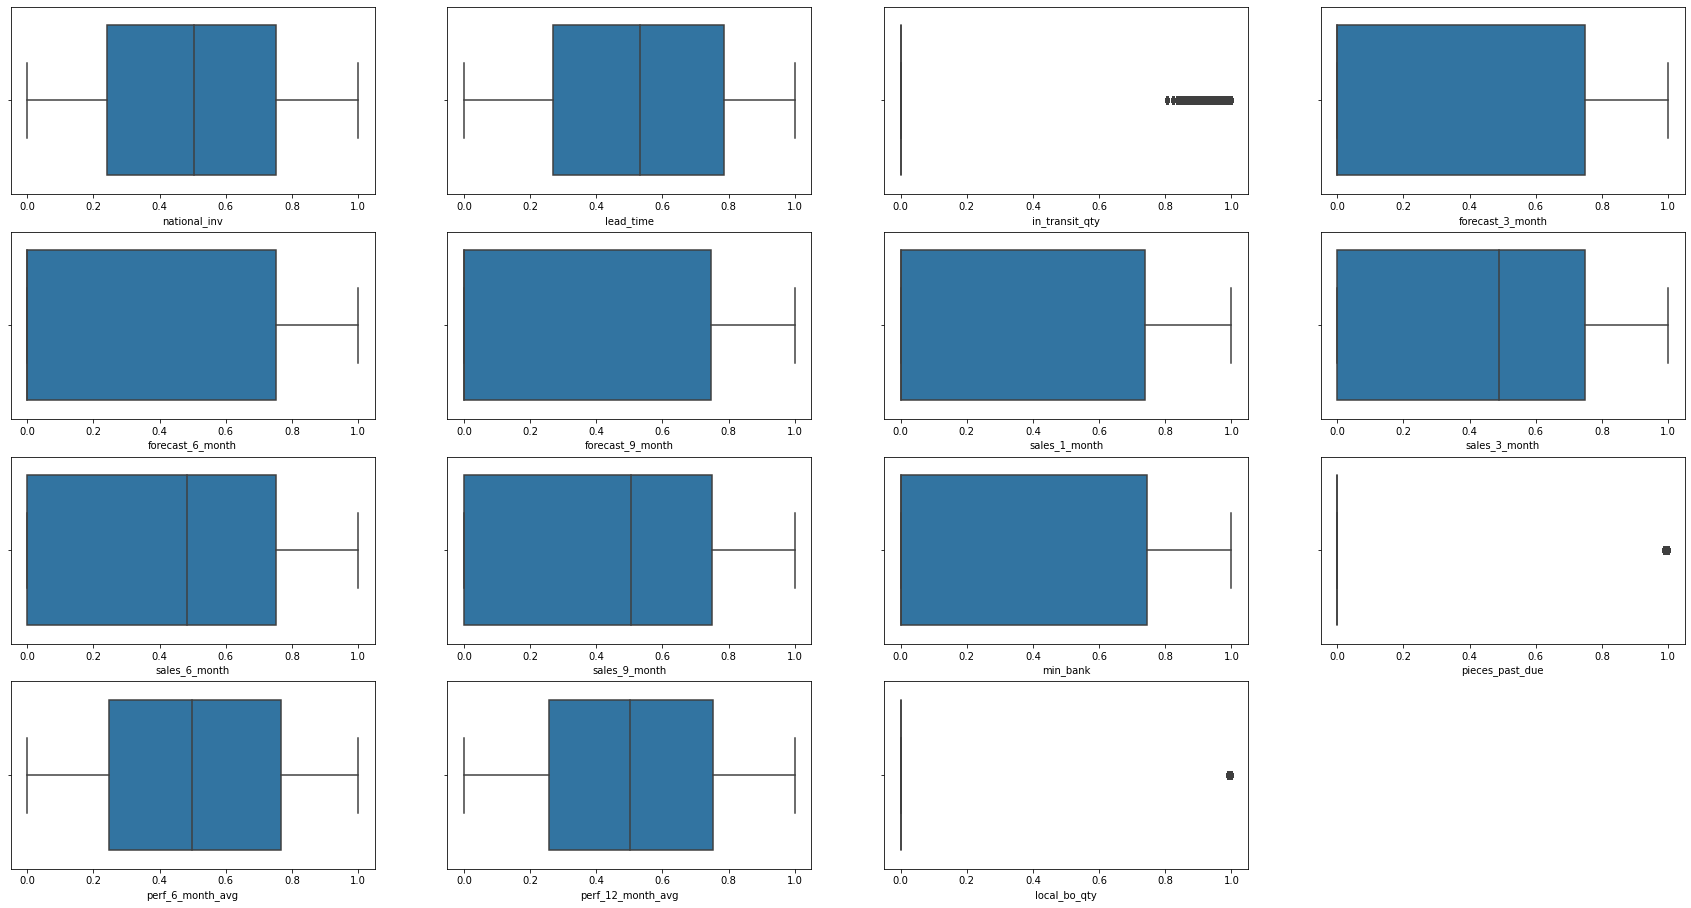

In [26]:
j = 1
plt.figure(figsize = (30,20))
for i in df_t.columns:
  plt.subplot(5,4,j)
  sns.boxplot(x = df_t[i])
  j+=1

plt.show()

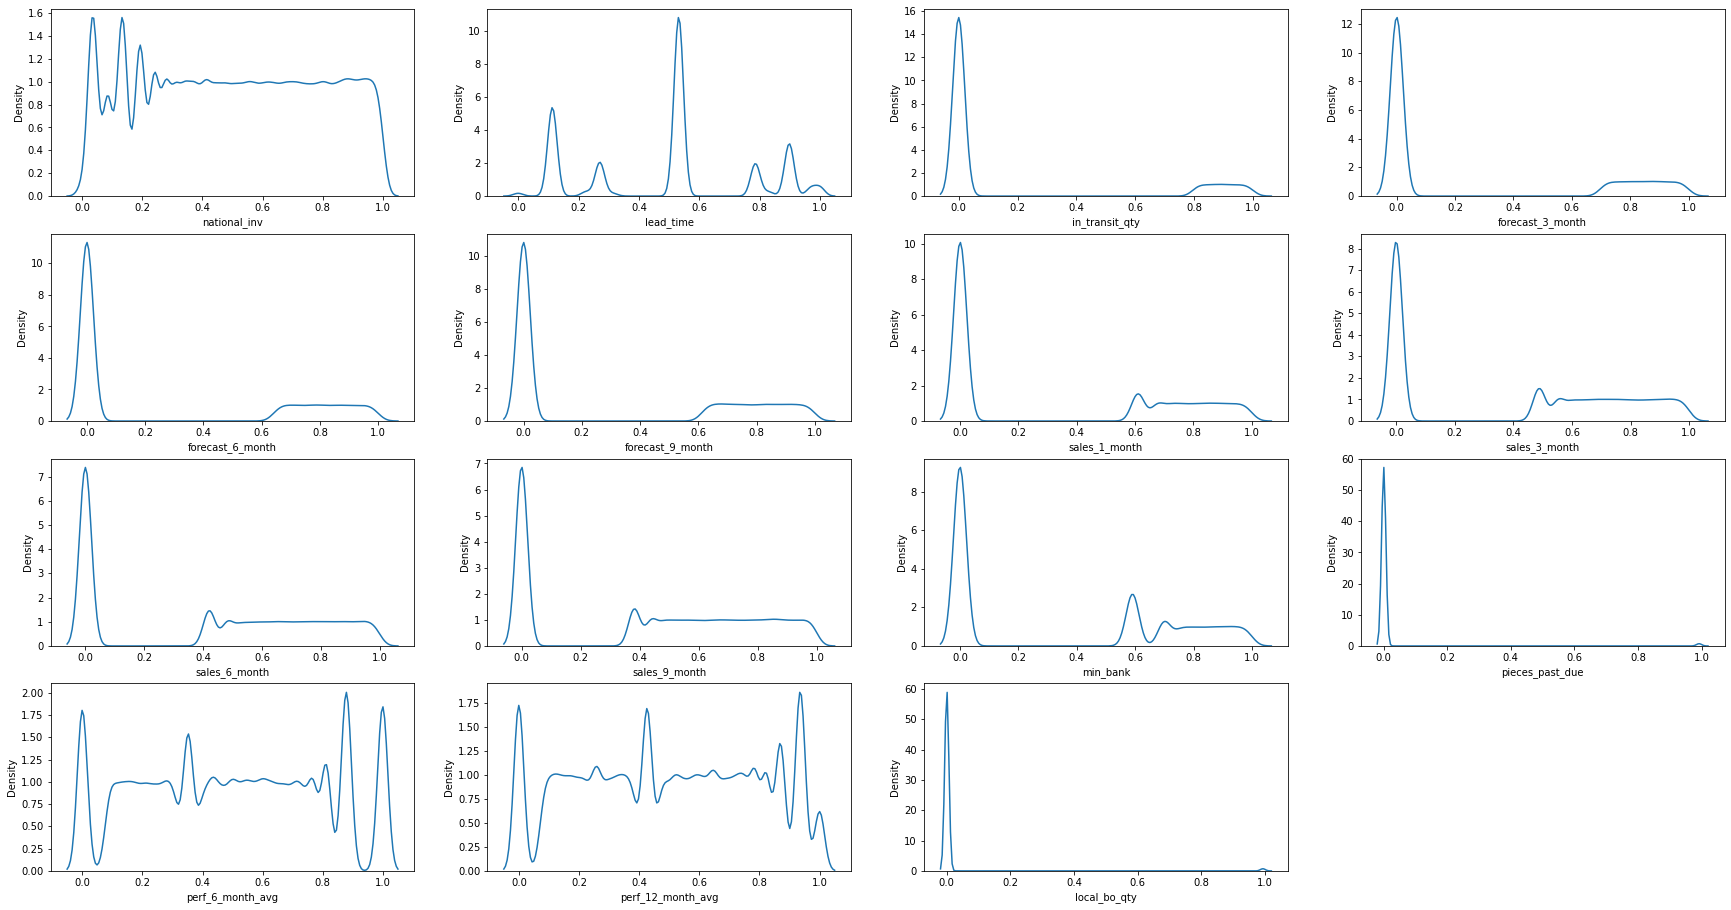

In [27]:
j = 1
plt.figure(figsize = (30,20))
for i in df_t.columns:
  plt.subplot(5,4,j)
  sns.kdeplot(df_t[i])
  j+=1
plt.show()

In [28]:
#sns.pairplot(df_num)

In [29]:
df_log = np.log(df_num)

df_log.head() # Log tranform cannot be used as it has 0 as values

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-inf,NaN,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN,NaN,-inf
1,0.693147,2.197225,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-0.010050,-0.010050,-inf
2,0.693147,NaN,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN,NaN,-inf
3,1.945910,2.079442,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,-2.302585,-2.040221,-inf
4,2.079442,NaN,-inf,-inf,-inf,-inf,-inf,-inf,-inf,1.386294,0.693147,-inf,NaN,NaN,-inf


In [30]:
from scipy import stats

In [31]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df_power = power.fit_transform(df_num)

In [32]:
df_power_df = pd.DataFrame(data = df_power, columns = df_num.columns)

In [33]:
df_power_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.065044,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,-0.857913,-0.123332,-2.617953,-2.668166,-0.11842
1,-0.063067,0.500224,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,-0.857913,-0.123332,0.920468,0.973754,-0.11842
2,-0.063067,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,-0.857913,-0.123332,-2.617953,-2.668166,-0.11842
3,-0.059309,0.324634,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,0.122850,-0.123332,-1.449815,-1.468506,-0.11842
4,-0.058648,NaN,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-0.049247,0.524241,-0.123332,-2.617953,-2.668166,-0.11842


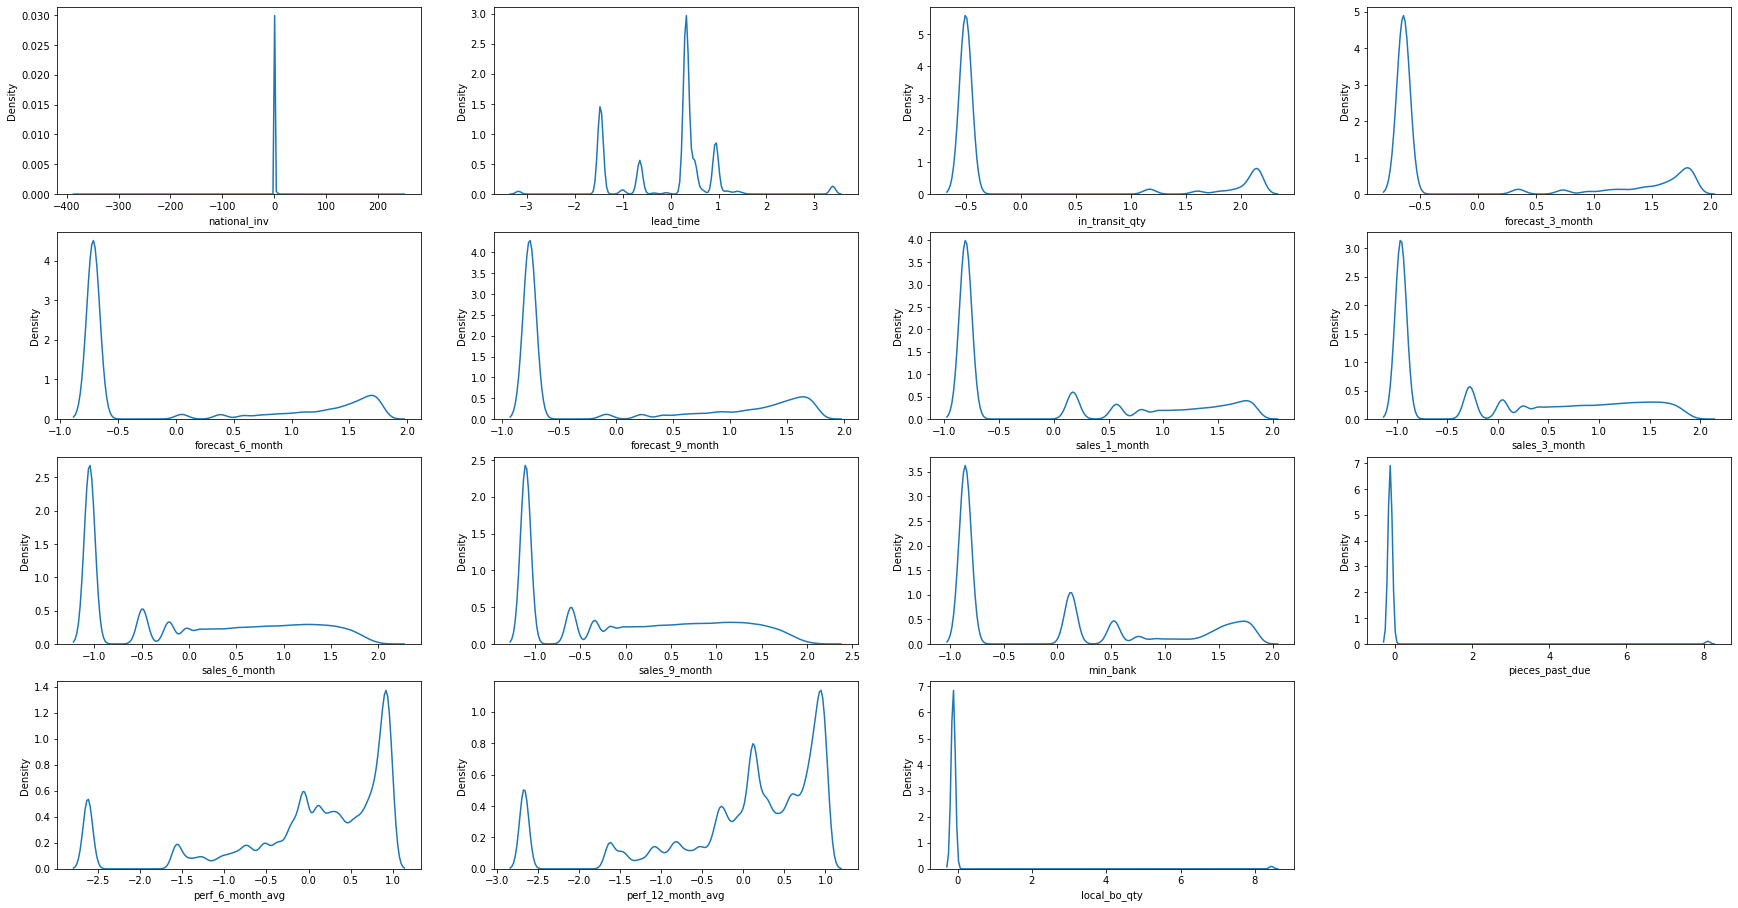

In [34]:
j = 1
plt.figure(figsize = (30,20))
for i in df_power_df.columns:
  plt.subplot(5,4,j)
  sns.kdeplot(df_power_df[i])
  j+=1
plt.show()

In [35]:
orginal = pd.Series(df_num.skew())

In [36]:
quant_trans = pd.Series(df_t.skew())
yeo_john_trans = pd.Series(df_power_df.skew()) 

In [37]:

dict_skew = {'Orginal Skew': orginal, 'Quantile Skew' : quant_trans, 'Yeo-Johnson Skew' : yeo_john_trans}

In [38]:
df_skew = pd.concat(dict_skew, axis = 1)

df_skew

,Orginal Skew,Quantile Skew,Yeo-Johnson Skew
national_inv,340.285800,0.005417,-51.293170
lead_time,4.556295,0.009613,0.010469
in_transit_qty,166.183404,1.494227,1.536304
forecast_3_month,138.968325,0.909172,1.000305
forecast_6_month,138.961427,0.668293,0.785962
forecast_9_month,143.298875,0.553156,0.689087
sales_1_month,196.119990,0.403116,0.653692
sales_3_month,141.286380,0.077493,0.423210
sales_6_month,139.176712,-0.057309,0.318309
sales_9_month,135.054191,-0.105950,0.268139


In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_ss = ss.fit_transform(df_t)

df_ss1 = pd.DataFrame(df_ss, columns = df_t.columns)

df_ss1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-1.605700,NaN,-0.50384,-0.65326,-0.737201,-0.783677,-0.8523,-1.050964,-1.171515,-1.237840,-0.937548,-0.123331,-1.676417,-1.695013,-0.118419
1,-1.266597,1.034544,-0.50384,-0.65326,-0.737201,-0.783677,-0.8523,-1.050964,-1.171515,-1.237840,-0.937548,-0.123331,1.270338,1.487812,-0.118419
2,-1.266597,NaN,-0.50384,-0.65326,-0.737201,-0.783677,-0.8523,-1.050964,-1.171515,-1.237840,-0.937548,-0.123331,-1.676417,-1.695013,-0.118419
3,-0.555518,0.113322,-0.50384,-0.65326,-0.737201,-0.783677,-0.8523,-1.050964,-1.171515,-1.237840,0.575539,-0.123331,-1.318980,-1.340987,-0.118419
4,-0.467282,NaN,-0.50384,-0.65326,-0.737201,-0.783677,-0.8523,-1.050964,-1.171515,0.184673,0.853557,-0.123331,-1.676417,-1.695013,-0.118419


In [40]:
df_ss1.skew()

national_inv         0.005417
lead_time            0.009613
in_transit_qty       1.494227
forecast_3_month     0.909172
forecast_6_month     0.668293
forecast_9_month     0.553156
sales_1_month        0.403116
sales_3_month        0.077493
sales_6_month       -0.057309
sales_9_month       -0.105950
min_bank             0.243741
pieces_past_due      7.985102
perf_6_month_avg    -0.001055
perf_12_month_avg   -0.042599
local_bo_qty         8.326303
dtype: float64

In [41]:
df_cat1 = df.select_dtypes(include = 'object').drop('sku', axis = 1)

In [42]:
df_cat = pd.get_dummies(data = df_cat1, drop_first = True)

In [43]:
df_cat['sku'] = df['sku']

In [44]:
df_cat.set_index('sku').head()

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
sku,,,,,,,
1026827,0,0,0,0,1,0,0
1043384,0,0,0,0,1,0,0
1043696,0,1,0,0,1,0,0
1043852,0,0,0,0,1,0,0
1044048,0,1,0,0,1,0,0


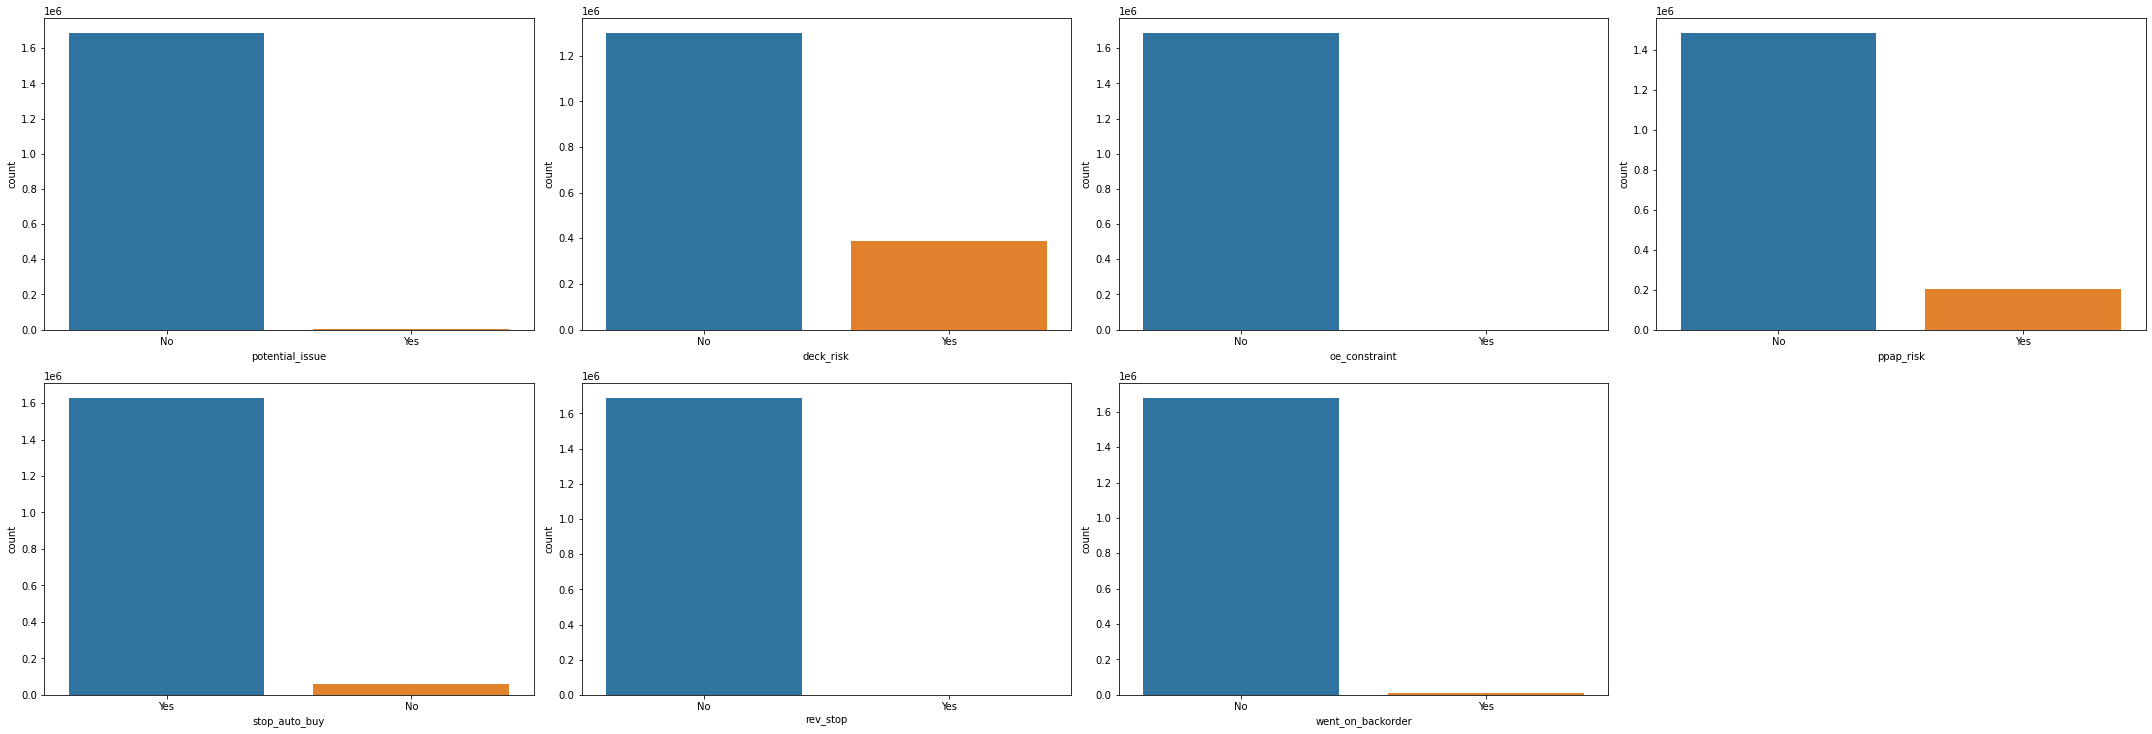

In [45]:
## Count Plot of Categorical Features
j=1
plt.figure(figsize = (30,20))
plt.title('Countplot of Categorical Columns')
plt.grid(True)
for i in df_cat1.columns:
  plt.subplot(4,4,j)
  sns.countplot(x = df_cat1[i])
  j+=1
  plt.tight_layout()
plt.show()

In [50]:
df_num.isnull().sum()

national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
dtype: int64